In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px # Для отображения на карте
import calendar


## 1. Загрузка датасетов с собственного репозитория GitHub

### Импортируем базы данных с репозитория гитхаба в формате raw. [Как это сделать](https://machinelearningmastery.ru/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92/?ysclid=lktrfsppjp424521547)

In [483]:
url = 'https://raw.githubusercontent.com/KolyaDavydov/Data-google-colab/develop/datasets/dataset_tk.csv'
url_long = 'https://raw.githubusercontent.com/KolyaDavydov/Data-google-colab/develop/datasets/long_data_.csv'
df = pd.read_csv(url)
df_long = pd.read_csv(url_long)



Представлены два dataset показывающие потребление энергии в МВт*ч по различным штатам Индии в период с 02.января.2019 по 12.декабря.2020 года

## 2. проведем первичный анализ данных, описательную статистику

#### данные df

In [484]:
df.info()
# показанно ежедневное потребление энергии по разным штатам Индии (за 503 дня, Однако полностью строки данных некоторых дней полностью отсутствуют).
# ДАННЫЕ С 2 ЯНВАРЯ 2019 ПО 5 ДЕКАБРЯ 2020 ГОДА
#   АНАЛИЗ МОЖНО ПРОВОДИТЬ ТОЛЬКО ПО СРЕДНЕСУТОЧНОМУ ЗНАЧЕНИЮ, АНАЛИЗ ОБЩЕГО ПОТРЕБЛЕНИЯ НЕ ВОЗМОЖЕН
# Всего 34 колоны из них 33 штата и 1 столбец обозначает дату, однако этот столбец без именнаый и его нужно перефармотировать в Date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [485]:
df_copy=df # копируем датасет
df_copy["Date"]=df["Unnamed: 0"] # Создаем новый столбец 'Date' из некотегориальных дат
# Данные некоторых дней отсутствуют,
df_copy['Date']=pd.to_datetime(df_copy.Date, dayfirst=True) # Преобразуем в тип Date
df_copy=df_copy.drop(["Unnamed: 0"], axis = 1) # Удаляем старый столбец с некотегориальными данными
df_copy['Month'] = df_copy['Date'].dt.to_period("M") # добавим дополнительный столбец с разбивкой по месяцам
df_copy['Year'] = df_copy['Date'].dt.to_period("Y")
df_copy['Only_Month'] = pd.to_datetime(df_copy['Date']).dt.month.apply(lambda x: calendar.month_abbr[x])
df_copy.tail(50)


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Date,Month,Year,Only_Month
453,188.4,179.9,264.9,123.8,443.4,42.7,26.8,46.0,6.1,90.0,...,29.3,2.2,6.0,1.6,2.3,4.6,2020-05-02,2020-05,2020,May
454,88.2,89.5,187.7,64.8,282.8,21.2,16.1,37.8,2.9,77.3,...,21.4,2.3,4.0,1.5,2.1,3.9,2020-05-03,2020-05,2020,May
455,91.2,91.0,171.6,61.2,280.0,22.3,17.6,38.7,3.0,72.1,...,24.6,2.5,4.3,1.5,2.1,3.6,2020-05-04,2020-05,2020,May
456,100.5,108.2,185.3,65.8,260.8,25.3,18.4,40.7,3.2,70.8,...,22.8,2.4,4.3,1.3,2.0,3.4,2020-05-05,2020-05,2020,May
457,105.4,106.9,178.8,68.5,269.3,25.3,19.9,39.2,3.3,70.8,...,21.9,2.3,4.4,1.6,2.1,3.3,2020-05-13,2020-05,2020,May
458,112.9,109.1,192.5,65.7,257.6,22.7,17.4,41.9,3.2,65.6,...,21.8,2.2,4.6,1.7,2.0,1.4,2020-05-14,2020-05,2020,May
459,121.1,120.2,208.7,71.8,300.3,26.5,19.2,44.1,3.3,68.2,...,23.0,2.2,4.8,1.5,2.1,3.3,2020-05-15,2020-05,2020,May
460,129.2,126.3,214.8,75.0,316.6,28.0,19.6,42.9,3.4,67.9,...,25.0,2.3,4.9,1.7,2.2,4.6,2020-05-16,2020-05,2020,May
461,113.0,123.6,245.1,70.7,283.5,38.3,30.2,50.2,4.1,80.9,...,22.4,2.7,6.7,1.7,2.3,3.4,2020-05-17,2020-05,2020,May
462,120.2,128.5,249.0,69.8,287.4,39.3,30.7,53.6,4.2,77.7,...,22.3,2.7,6.5,1.7,2.3,3.5,2020-05-18,2020-05,2020,May


In [486]:
df_copy.info() # Получился датасет, нулевых значений нет, все данные категориальные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Punjab             503 non-null    float64       
 1   Haryana            503 non-null    float64       
 2   Rajasthan          503 non-null    float64       
 3   Delhi              503 non-null    float64       
 4   UP                 503 non-null    float64       
 5   Uttarakhand        503 non-null    float64       
 6   HP                 503 non-null    float64       
 7   J&K                503 non-null    float64       
 8   Chandigarh         503 non-null    float64       
 9   Chhattisgarh       503 non-null    float64       
 10  Gujarat            503 non-null    float64       
 11  MP                 503 non-null    float64       
 12  Maharashtra        503 non-null    float64       
 13  Goa                503 non-null    float64       
 14  DNH       

In [487]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


#### данные df_long

In [488]:
# Паределываем строковый Dates в категориальный datetime и добавим колонку только с годом и месяцем
df_long['Dates'] = pd.to_datetime(df_long.Dates, dayfirst=True)
df_long['Month'] = df_long['Dates'].dt.to_period("M")
df_long['Year'] = df_long['Dates'].dt.to_period("Y")
df_long["Regions"] = df_long["Regions"].astype('category')
df_long['Only_Month'] = pd.to_datetime(df_long['Dates']).dt.month.apply(lambda x: calendar.month_abbr[x])
df_long

,States,Regions,latitude,longitude,Dates,Usage,Month,Year,Only_Month
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019-01,2019,Jan
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019-01,2019,Jan
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019-01,2019,Jan
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019-01,2019,Jan
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019-01,2019,Jan
...,...,...,...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,2020-12-05,2.5,2020-12,2020,Dec
16595,Meghalaya,NER,25.570492,91.880014,2020-12-05,5.8,2020-12,2020,Dec
16596,Mizoram,NER,23.710399,92.720015,2020-12-05,1.6,2020-12,2020,Dec
16597,Nagaland,NER,25.666998,94.116570,2020-12-05,2.1,2020-12,2020,Dec


In [489]:
# Всего у нас пять различных регионов:
df_long.Regions.unique()

['NR', 'WR', 'SR', 'ER', 'NER']
Categories (5, object): ['ER', 'NER', 'NR', 'SR', 'WR']

In [490]:
# и 33 различных региона:
df_long.States.unique()

array(['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype=object)

## 3. Потребление регионов и штатов за исследуемый период

In [491]:
# среднесуточное потребление энергии городов за исследуемый период
df_by_state = df_long.groupby(['States']).agg({'Usage': ['mean']})
df_by_state

,Usage
,mean
States,
Andhra Pradesh,176.151889
Arunachal Pradesh,2.109145
Assam,24.960040
Bihar,83.159443
Chandigarh,4.141551
Chhattisgarh,83.877137
DNH,16.430616
Delhi,83.380716


Text(0, 0.5, 'среднесуточное потребление энергии, МВт*ч')

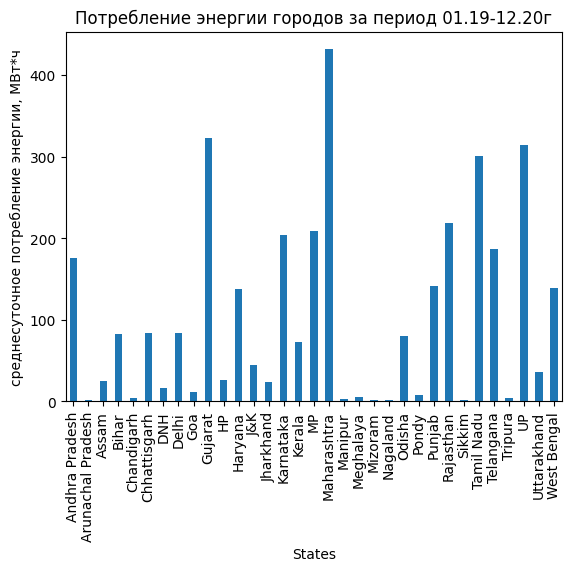

In [492]:
df_by_state.plot.bar(legend=False)
plt.title('Потребление энергии городов за период 01.19-12.20г')
plt.ylabel('среднесуточное потребление энергии, МВт*ч')


array([<Axes: ylabel='(Usage, mean)'>], dtype=object)

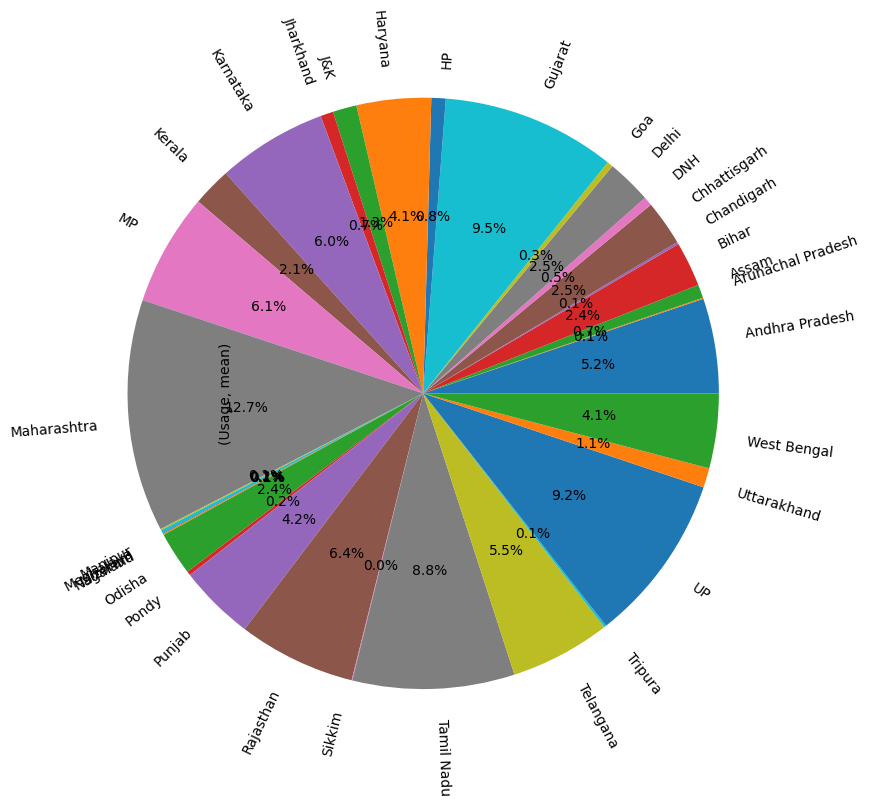

In [493]:
df_by_state.plot.pie(subplots=True, legend=False, radius=2, rotatelabels=True, autopct='%1.1f%%')
# Самое большое среднесуточное потребление у региона Maharashtra, куда входит самый большой город ИНдии - Мумбаи

Text(0, 0.5, 'МВт*ч')

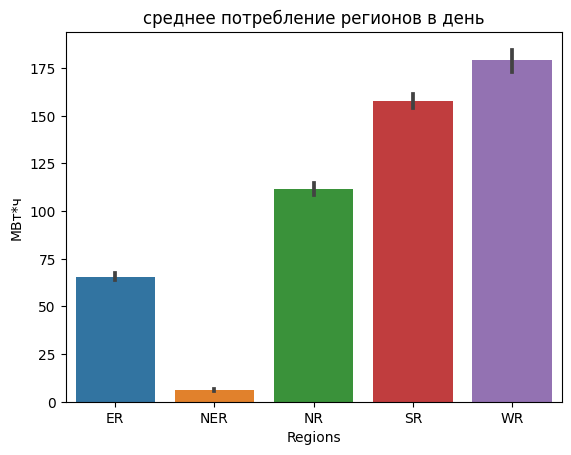

In [494]:
df_long
sns.barplot(data=df_long, x='Regions', y ='Usage', estimator='mean')
plt.title('среднее потребление регионов в день')
plt.ylabel('МВт*ч')

Text(0.5, 1.0, 'Среднесуточное потребление 5 регионов по месяцам')

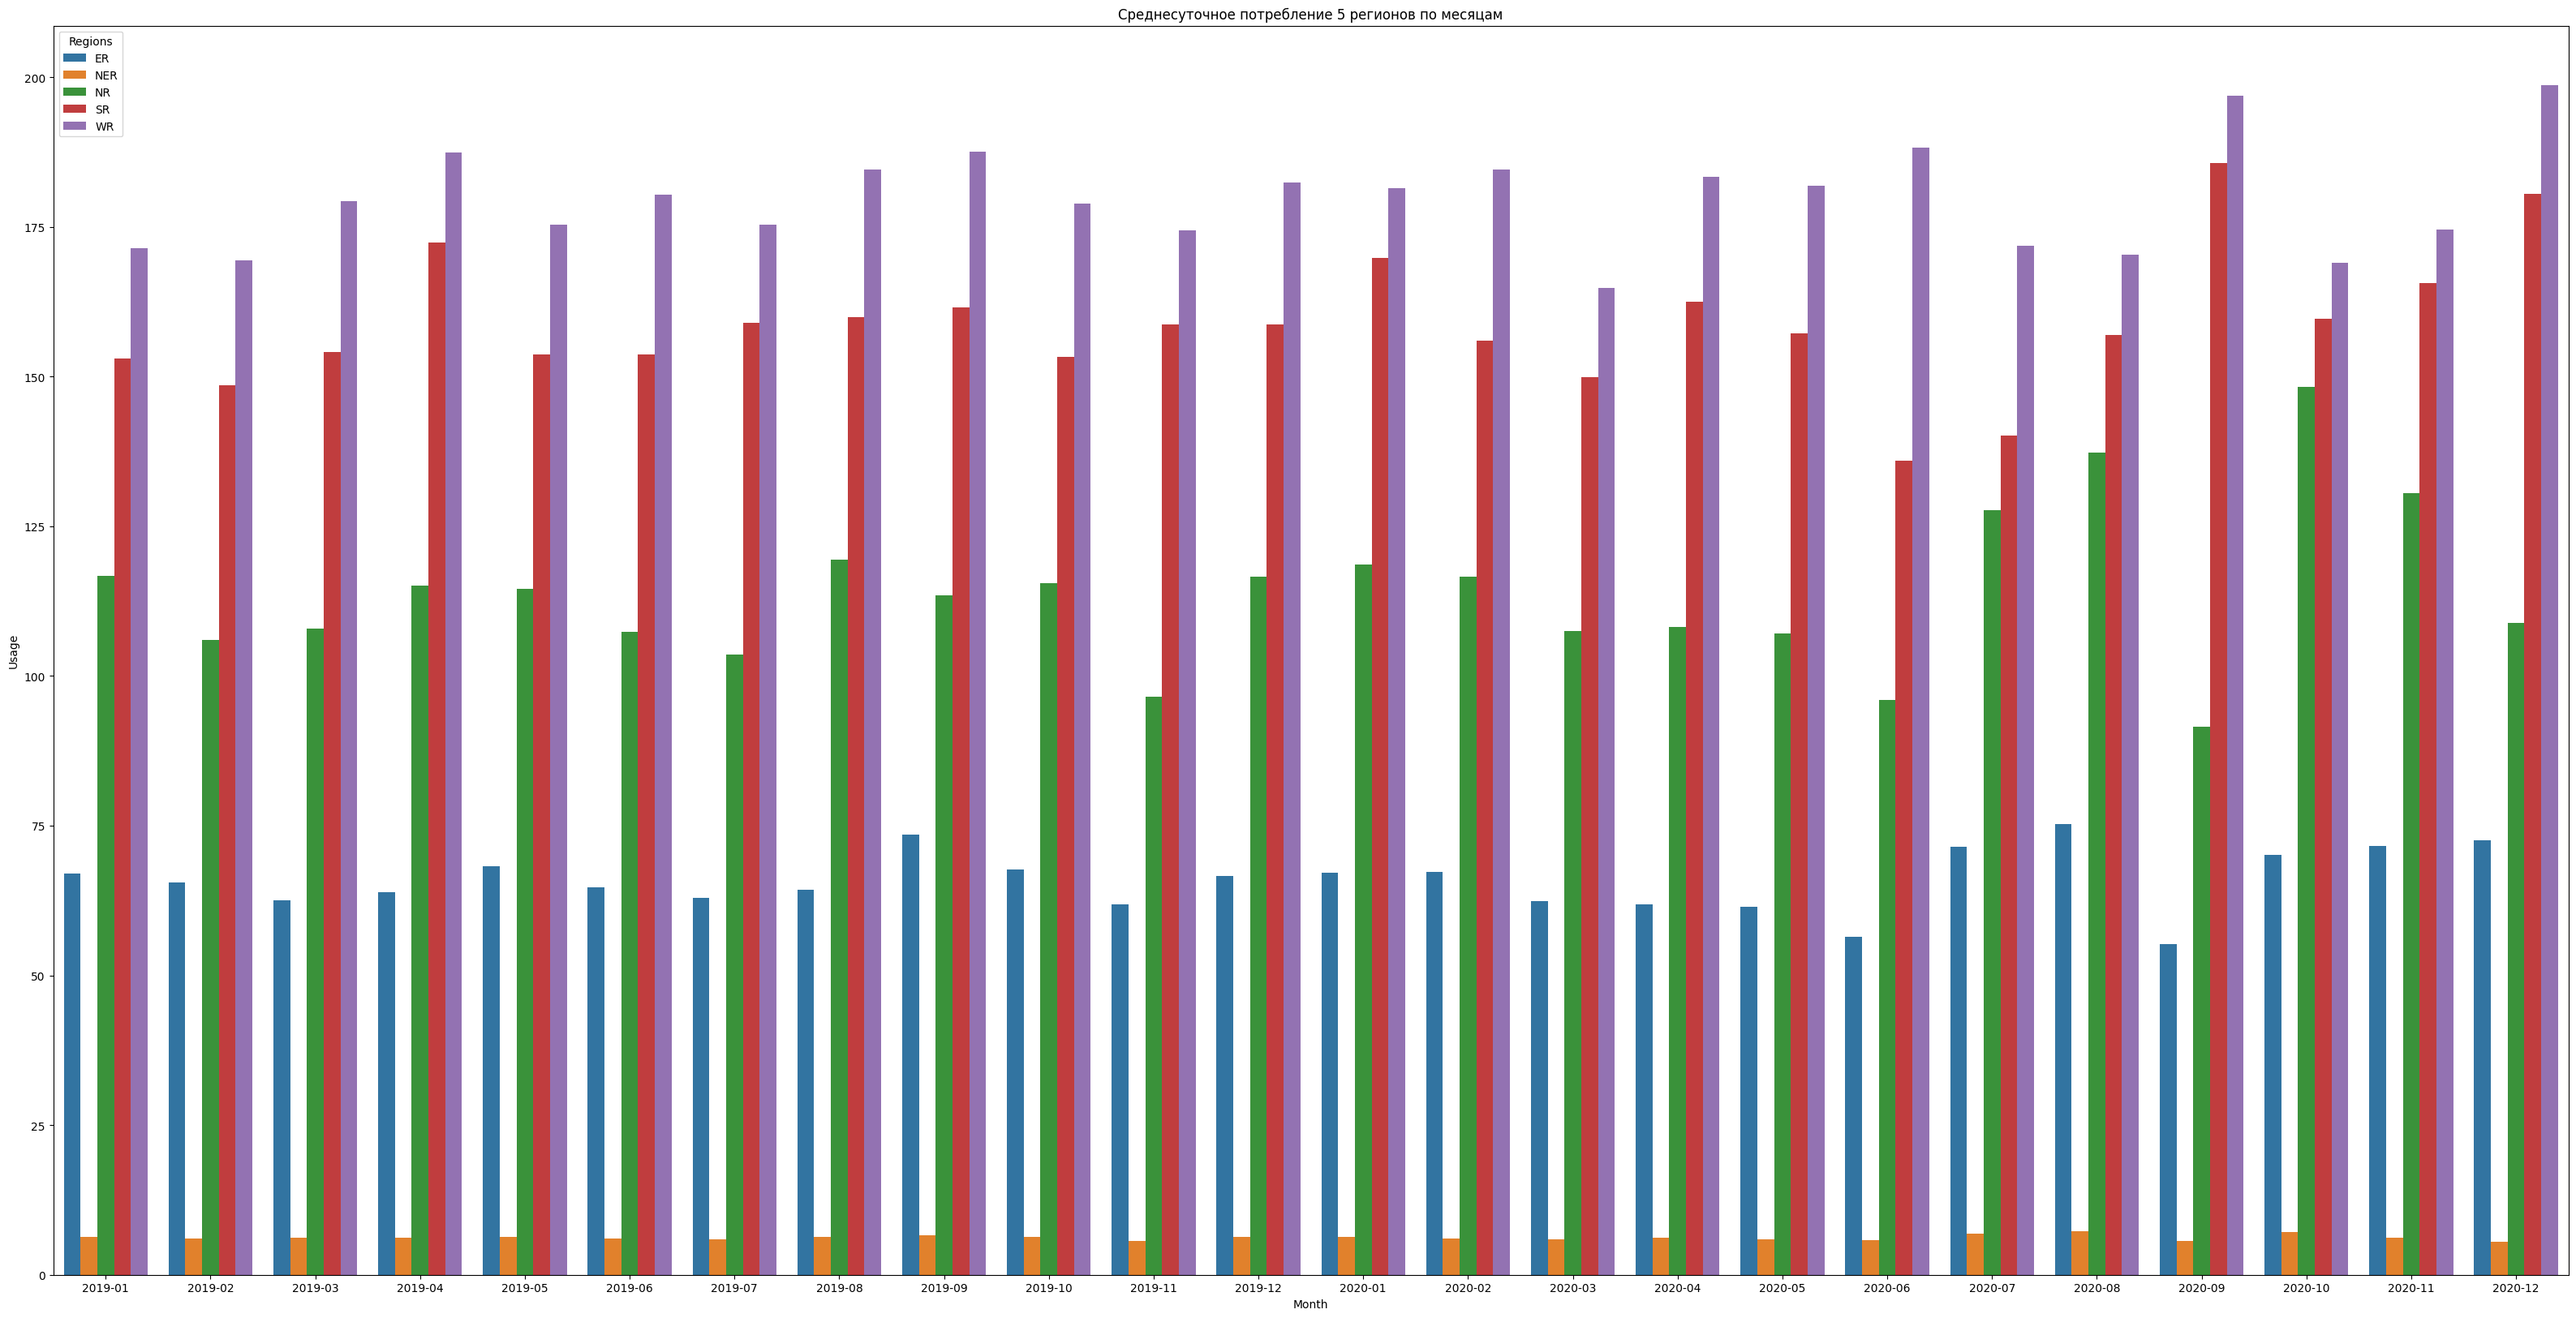

In [495]:
ax=sns.barplot(data=df_long, x='Month', y ='Usage', hue='Regions', estimator='mean', errorbar=None)
ax.figure.set_size_inches(40,20)
plt.title('Среднесуточное потребление 5 регионов по месяцам')

## 4. Описание наблюдений

### Наблюдение №1
Самые потребляемые регионы это Южные и западные что располагаются вдоль побережью, очевидно что это промышленные регионы

Text(0.5, 1.0, 'Относительное расположение штатов на карте')

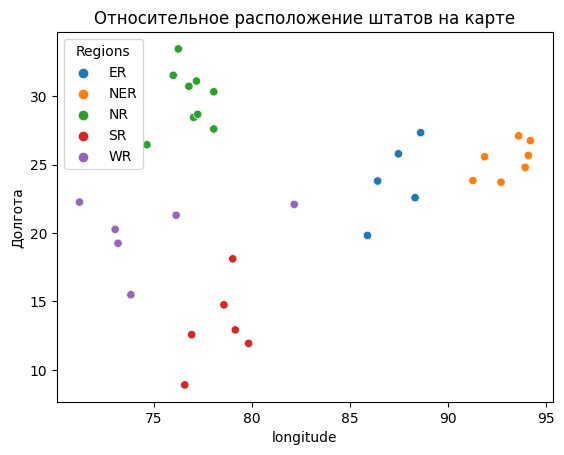

In [496]:
sns.scatterplot(data=df_long, x='longitude',y='latitude',hue='Regions')
plt.ylabel('Широта')
plt.ylabel('Долгота')
plt.title('Относительное расположение штатов на карте')

In [497]:
fig = px.scatter_geo(df_long,'latitude','longitude', color="Regions",hover_name="States", size="Usage", scope='asia')
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100])

### Наблюдение №2
Данные по среднему потреблению в различных регионам по двум годам.
В целом среднее потребление не изменилось по годам, Отсюда делается вывод что коронавируса в Индии не было. Более того в промышленных регионах среднее потребление даже немного выросло.

<Axes: xlabel='Year', ylabel='Usage'>

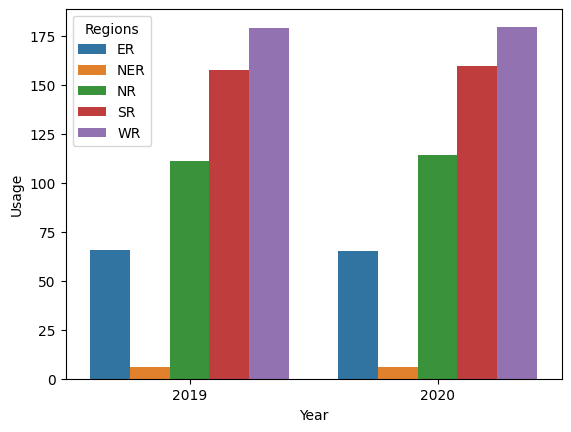

In [498]:
sns.barplot(data=df_long, x='Year', y ='Usage', hue='Regions', estimator='mean', errorbar=None)


<Axes: xlabel='Regions', ylabel='Usage'>

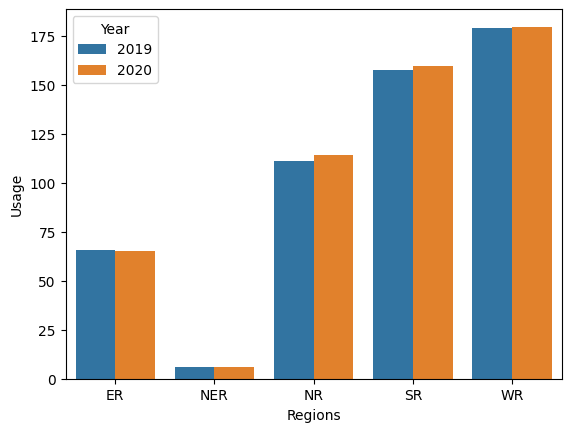

In [499]:
sns.barplot(data=df_long, x='Regions', y ='Usage', hue='Year', estimator='mean', errorbar=None)

### Наблюдение #3
Несмотря на то что чредние значения по годам для среднего потребления в 2020 году даже выросло, можно заметить отчетливую тенденцию снижения потребления в период март-июнь в 2020 году по сравнению с 2019 годам - вероятная причина локдаун в связи с коронавирусом, который как раз начался в марте 2020 года

<Axes: xlabel='Only_Month', ylabel='Usage'>

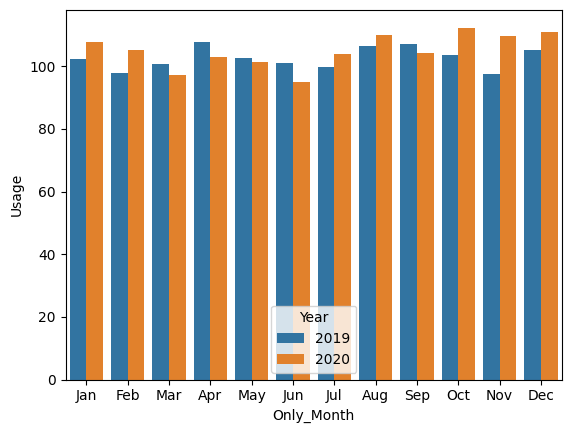

In [500]:
df_long
sns.barplot(data=df_long, x='Only_Month', y ='Usage', hue='Year', estimator='mean', errorbar=None)